# package initial

In [ ]:
from google.colab import drive
from zipfile import ZipFile
import matplotlib.pyplot as plt
import cv2
import os
import shutil

In [ ]:
if not os.path.exists("yolov4_face_mask.weights"):
    drive.mount('/content/drive')

In [ ]:
if not os.path.exists("yolov4_face_mask.weights"):
    !git clone https://github.com/AlexeyAB/darknet

    %cd darknet
    !sed -i 's/OPENCV=0/OPENCV=1/' Makefile
    !sed -i 's/GPU=0/GPU=1/' Makefile
    !sed -i 's/CUDNN=0/CUDNN=1/' Makefile
    !sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

    !make

In [ ]:
if not os.path.exists("yolov4_face_mask.weights"):
    !cp /content/drive/MyDrive/paper/resource2/obj.data obj.data
    !cp /content/drive/MyDrive/paper/resource2/obj.names obj.names
    !cp /content/drive/MyDrive/paper/resource2/yolov4.cfg yolov4.cfg
    !cp /content/drive/MyDrive/paper/resource2/yolov4_face_mask.weights yolov4_face_mask.weights
    !cp /content/drive/MyDrive/paper/resource2/test_images.zip test_images.zip

In [ ]:
shutil.rmtree('test_images', ignore_errors=True)
shutil.rmtree('result', ignore_errors=True)
ZipFile("test_images.zip").extractall("test_images")
!mkdir result

# prediction

In [ ]:
!./darknet detector test obj.data yolov4.cfg yolov4_face_mask.weights test_images/1.jpg -dont_show
shutil.move('predictions.jpg', 'result/predictions1.jpg')

!./darknet detector test obj.data yolov4.cfg yolov4_face_mask.weights test_images/2.jpg -dont_show
shutil.move('predictions.jpg', 'result/predictions2.jpg')

!./darknet detector test obj.data yolov4.cfg yolov4_face_mask.weights test_images/3.jpg -dont_show
shutil.move('predictions.jpg', 'result/predictions3.jpg')

!./darknet detector test obj.data yolov4.cfg yolov4_face_mask.weights test_images/4.jpg -dont_show
shutil.move('predictions.jpg', 'result/predictions4.jpg')

!./darknet detector test obj.data yolov4.cfg yolov4_face_mask.weights test_images/5.jpg -dont_show
shutil.move('predictions.jpg', 'result/predictions5.jpg')

!./darknet detector test obj.data yolov4.cfg yolov4_face_mask.weights test_images/6.jpg -dont_show
shutil.move('predictions.jpg', 'result/predictions6.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    640 x 640 x   3 ->  640 x 640 x  32 0.708 BF
   1 conv     64       3 x 3/ 2    640 x 640 x  32 ->  320 x 320 x  64 3.775 BF
   2 conv     64       1 x 1/ 1    320 x 320 x  64 ->  320 x 320 x  64 0.839 BF
   3 route  1 		                           ->  320 x 320 x  64 
   4 conv     64       1 x 1/ 1    320 x 320 x  64 ->  320 x 320 x  64 0.839 BF
   5 conv     32       1 x 1/ 1    320 x 320 x  64 ->  320 x 320 x  32 0.419 BF
   6 conv     64       3 x 3/ 1    320 x 320 x  32 ->  320 x 320 x  64 3.775 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 320 x 320 x  64 0.007 BF

'result/predictions6.jpg'

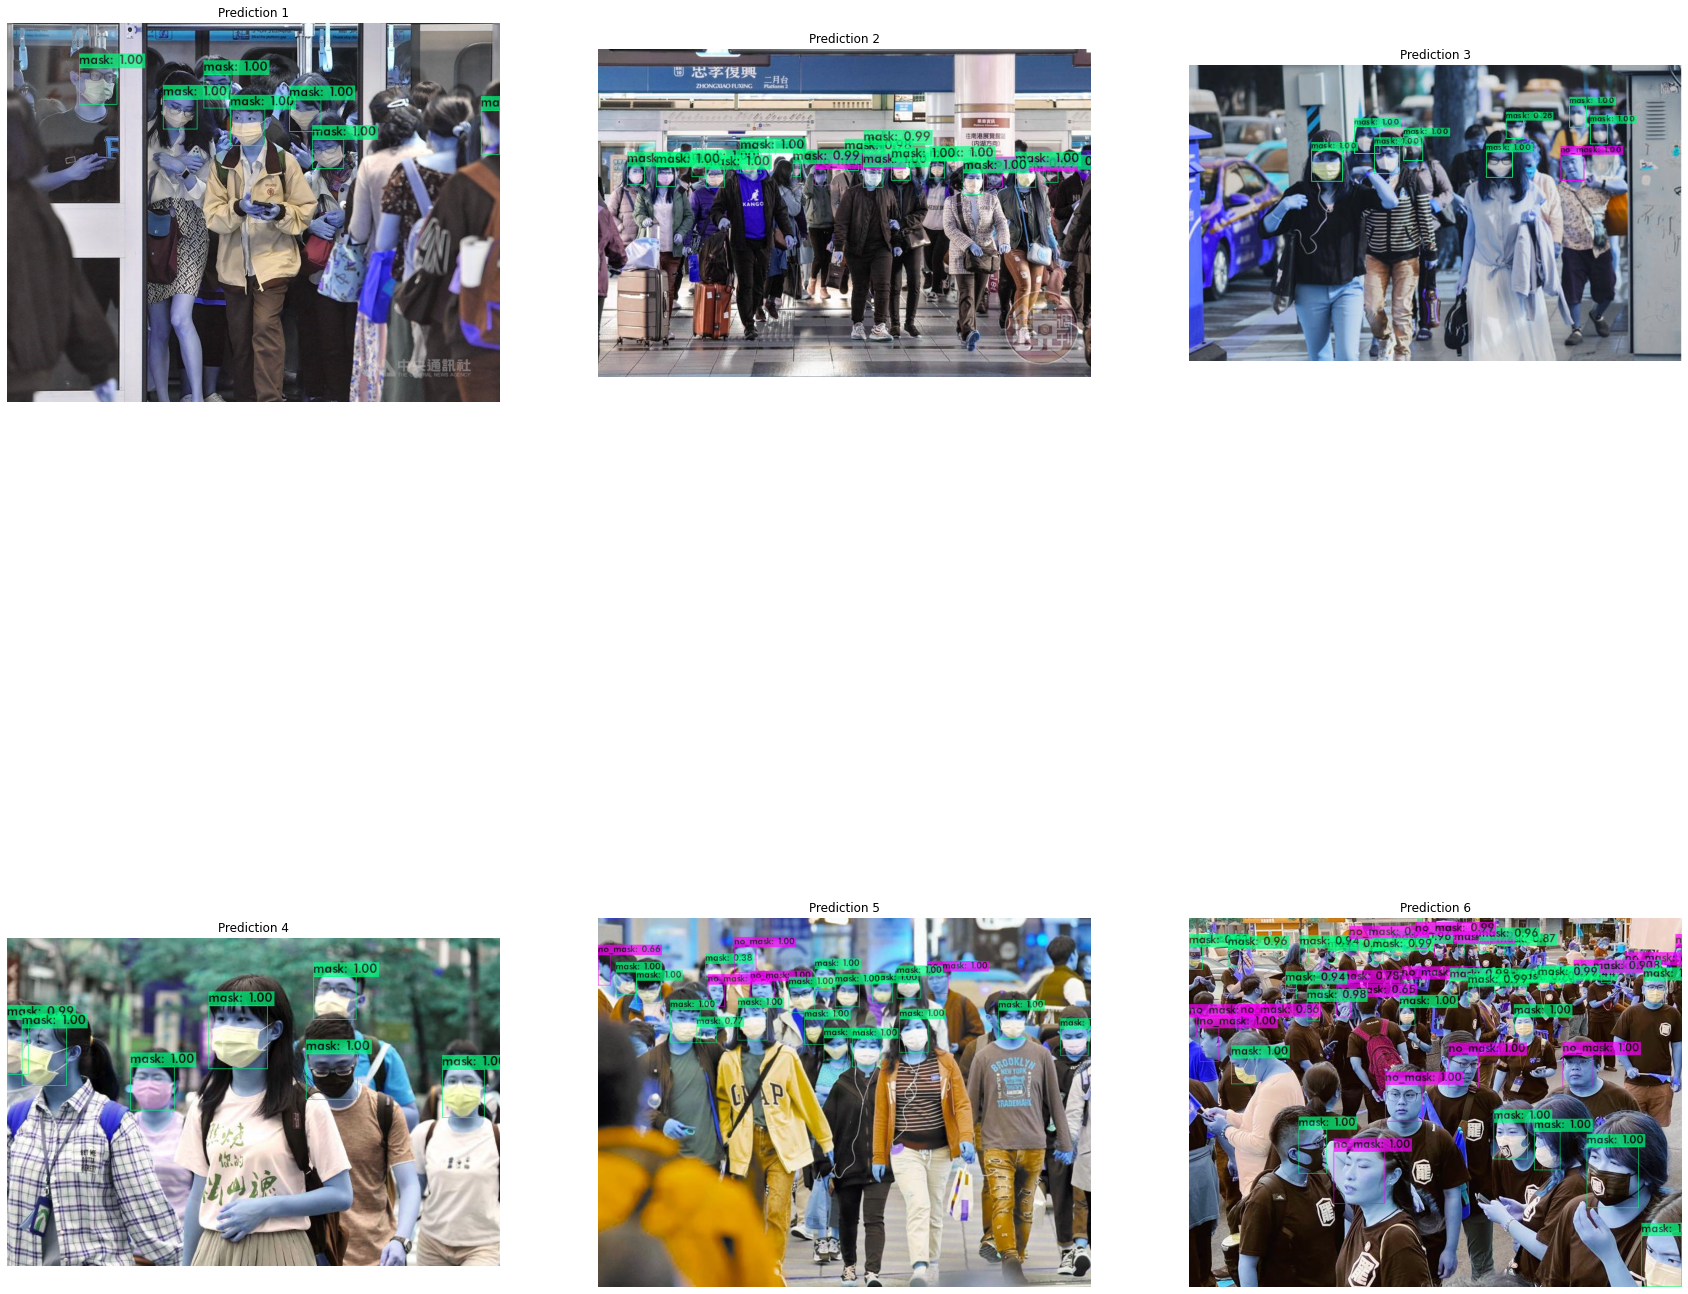

In [ ]:
count = 0
fig, axes = plt.subplots(2, 3, figsize=(30, 30))
for seq in range(1, 7):
    img = cv2.imread('result/predictions' + str(seq) + '.jpg')
    if img is not None:
        img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
        new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        ax = list(axes.flatten())[count]
        ax.imshow(img)
        ax.set_title('Prediction ' + str(count+1))
        ax.axis('off')
        count += 1
plt.show()